# Iris Species

## Load Dataset

## sklearn

In [160]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()


In [161]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [162]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"] = iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [163]:
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)' :'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)' :'petal_width'}, 
                          inplace=True)

In [164]:
iris_data["target_names"] = iris.target
iris_data["target_names"].replace({0:'setosa', 
                                   1:'versicolor', 
                                   2:'virginica'}, inplace=True)

In [165]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## seaborn

In [166]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Analysis

In [167]:
iris_data.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [168]:
import numpy as np

def KL(P,Q):
    """ Epsilon is used here to avoid conditional code for
    checking that neither P nor Q is equal to 0. """
    epsilon = 0.00001

     # You may want to instead make copies to avoid changing the np arrays.
    P = P+epsilon
    Q = Q+epsilon

    divergence = np.sum(P*np.log(P/Q))
    return divergence

# Should be normalized though
values1 = np.asarray([1.346112,1.337432,1.246655])
values2 = np.asarray([1.033836,1.082015,1.117323])

# Note slight difference in the final result compared to Dawny33
print(KL(values1, values2))# 0.775278939433

0.7752789394328498


In [169]:
from numpy import mean
cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
def cov(X, Y):
    return (np.sum(X - mean(X)) * (Y - mean(Y)) ) * 1/(len(X)-1)

SyntaxError: can't assign to function call (<ipython-input-169-5d519544d765>, line 2)

In [170]:
def pearson_coef(x, y):
    # Assume len(x) == len(y)
    n = len(x)
    sum_x = float(sum(x))
    sum_y = float(sum(y))
    sum_x_sq = sum(map(lambda x: x**2, x))
    sum_y_sq = sum(map(lambda x: x**2, y))
    psum = sum(map(lambda x, y: x * y, x, y))
    num = psum - (sum_x * sum_y/n)
    den = np.sqrt((sum_x_sq - sum_x**2 / n) * \
                  (sum_y_sq - sum_y**2 / n))
    if den == 0: return 0
    return num / den

In [171]:
pearson_coef(iris_data['sepal_length'],iris_data['petal_width'])

0.817941126271589

In [172]:
pearson_coef(iris_data['petal_width'], iris_data['petal_width'])

1.0

In [173]:
pearson_coef(iris_data['sepal_width'], iris_data['petal_width'])

-0.36612593253645903

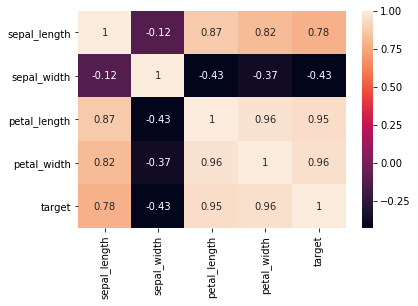

In [174]:
sns.heatmap(iris_data.corr(), annot=True)

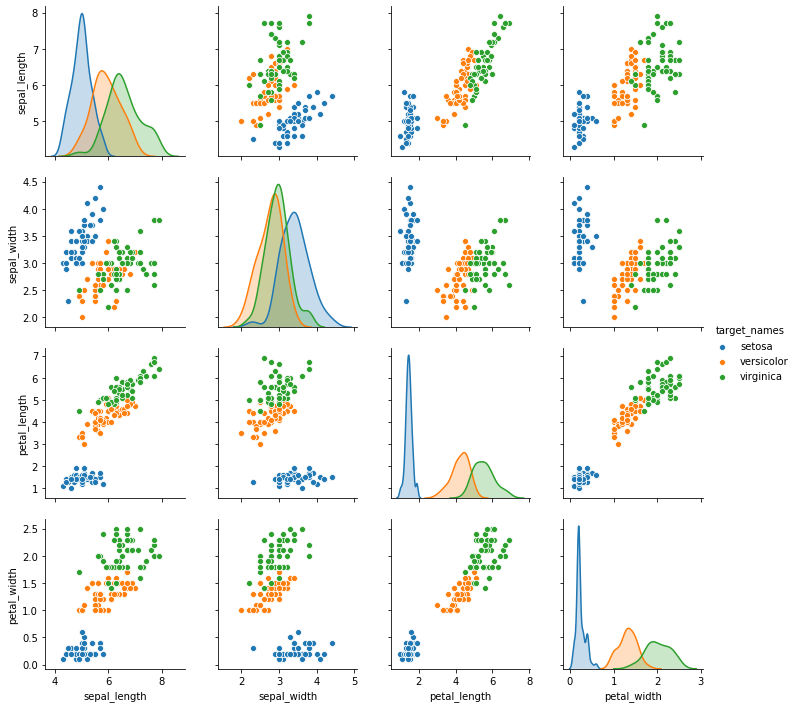

In [175]:
sns.pairplot(iris_data[['sepal_length', 'sepal_width', 'target_names',\
                        'petal_length', 'petal_width']], hue="target_names")

In [176]:
iris_data.drop(columns=['sepal_width'], inplace=True)
iris_data.head()

,sepal_length,petal_length,petal_width,target,target_names
0,5.1,1.4,0.2,0,setosa
1,4.9,1.4,0.2,0,setosa
2,4.7,1.3,0.2,0,setosa
3,4.6,1.5,0.2,0,setosa
4,5.0,1.4,0.2,0,setosa


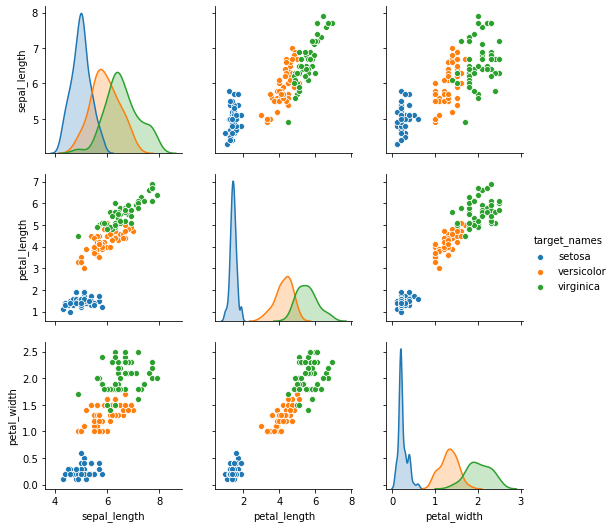

In [177]:
sns.pairplot(iris_data[['sepal_length', 'target_names',\
                        'petal_length', 'petal_width']], hue="target_names")

In [178]:
print(iris_data.shape)

(150, 5)


In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( \
    iris_data[['sepal_length','petal_length','petal_width']], \
    iris_data[['target']], test_size=0.33, random_state=1)
print(iris_data.shape)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(150, 5)


((100, 3), (50, 3), (100, 1), (50, 1))

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [220]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

1    19
0    17
2    14
Name: target, dtype: int64


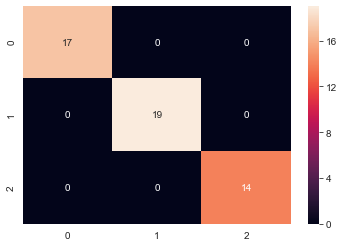

In [221]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)
print(y_test['target'].value_counts())

In [195]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.96        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



<Figure size 432x288 with 0 Axes>

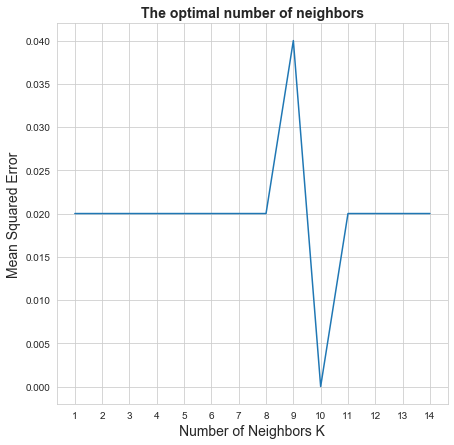

In [207]:
import matplotlib.pyplot as plt
from sklearn import metrics

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 15)
mse = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    mse.append(metrics.mean_squared_error(y_test, knn.predict(X_test)))

plt.figure()
plt.figure(figsize=(7,7))
plt.title('The optimal number of neighbors', fontsize=14, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
sns.set_style("whitegrid")
plt.xticks(np.arange(min(k_range), max(k_range)+1, 1.0))
plt.plot(k_range, mse)
plt.show()

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [231]:
# creating list of K for KNN
k_list = list(range(1,25,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [237]:
k_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

The optimal number of neighbors is 15.


<Figure size 432x288 with 0 Axes>

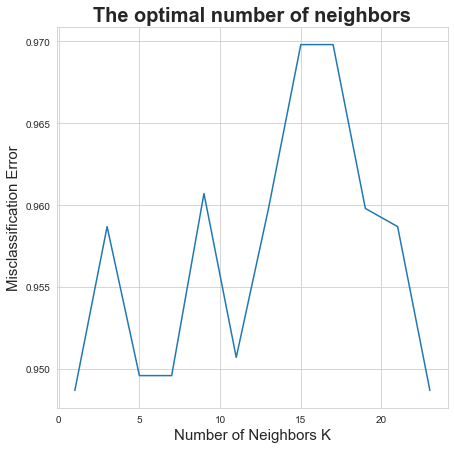

In [239]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(7,7))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
#plt.plot(k_list, MSE)
plt.plot(k_list, cv_scores)
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)
plt.show()

## K-Means

In [323]:
data = iris_data[['sepal_length', 'petal_length', 'petal_width']]
data.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [324]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, max_iter=1000)
model.fit(data)
print(model, end="\n\n")
print("Centriods: \n" + \
      str(model.cluster_centers_))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Centriods: 
[[5.00555556 1.5962963  0.3037037 ]
 [6.31458333 4.97395833 1.703125  ]]


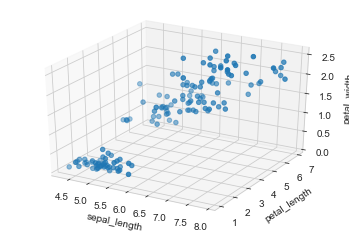

In [332]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["sepal_length"],
            data["petal_length"],
            data["petal_width"],)
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')
ax.set_zlabel('petal_width')
plt.show()

In [354]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, max_iter=1000)
pred = model.fit_predict(data.drop(columns=["sepal_length"]))
print(model, end="\n\n")
print("Centriods: \n" + \
      str(model.cluster_centers_))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Centriods: 
[[4.92525253 1.68181818]
 [1.49215686 0.2627451 ]]


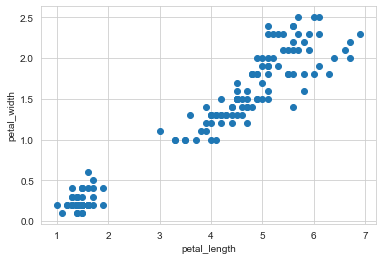

In [355]:
import matplotlib.pyplot as plt

plt.scatter(x=data["petal_length"],
                y=data["petal_width"])
plt.xlabel("petal_length"); plt.ylabel("petal_width");

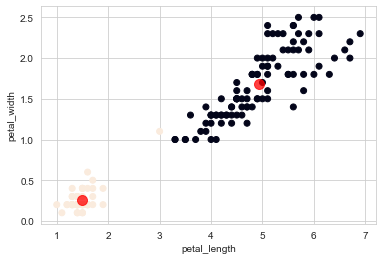

In [356]:
import matplotlib.pyplot as plt
plt.scatter(x=data["petal_length"],
            y=data["petal_width"], c=pred)
centers = model.cluster_centers_
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.scatter(centers[:, 0], centers[:, 1], c='Red', 
            s=100, alpha=0.75);

In [350]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, max_iter=1000)
pred = model.fit_predict(data.drop(columns=["sepal_length"]))
print(model, end="\n\n")
print("Centriods: \n" + \
      str(model.cluster_centers_))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Centriods: 
[[3.92222222 1.1962963 ]
 [1.462      0.246     ]
 [5.80285714 2.11142857]
 [4.77894737 1.61578947]]


Centriods: 
[[3.92222222 1.1962963 ]
 [1.462      0.246     ]
 [5.80285714 2.11142857]
 [4.77894737 1.61578947]]


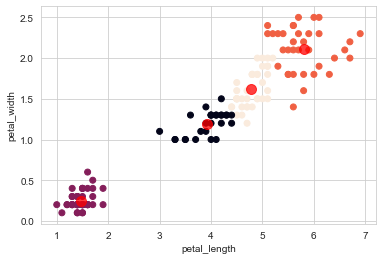

In [353]:
import matplotlib.pyplot as plt
plt.scatter(x=data["petal_length"],
            y=data["petal_width"], c=pred)
centers = model.cluster_centers_
plt.xlabel("petal_length")
plt.ylabel("petal_width")
print("Centriods: \n" + \
      str(model.cluster_centers_))
plt.scatter(centers[:, 0], centers[:, 1], c='Red', 
            s=100, alpha=0.75);

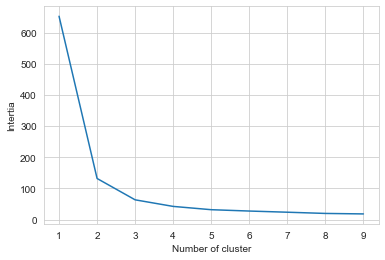

In [348]:
intertia = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(data)
    # Inertia: Sum of distances of samples to 
    # their closest cluster center
    intertia[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(intertia.keys()), list(intertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Intertia")
plt.show()

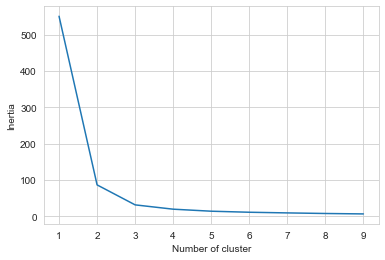

In [349]:
inertia = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(data.drop(columns=["sepal_length"]))
    # Inertia: Sum of distances of samples to 
    # their closest cluster center
    inertia[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

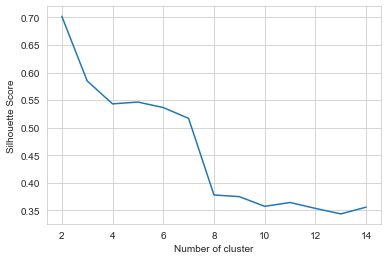

In [336]:
score = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(data)
    pred = kmeans.labels_
    score[k] = silhouette_score(data, pred)
plt.figure()
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

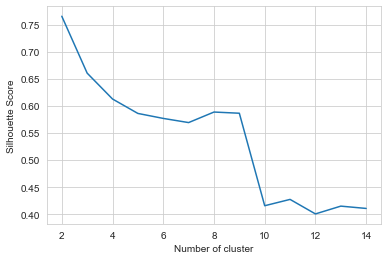

In [335]:
from sklearn.metrics import silhouette_score
score = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(data.drop(columns=["sepal_length"]))
    pred = kmeans.labels_
    score[k] = silhouette_score(data.drop(columns=["sepal_length"]), 
                                pred)
plt.figure()
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

## Regression

In [367]:
data = iris_data[['petal_length', 'petal_width',
                  'target', 'target_names']]
data.head()

,petal_length,petal_width,target,target_names
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


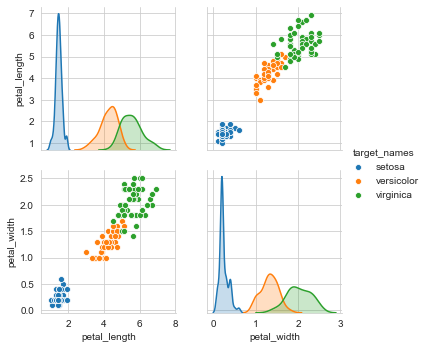

In [371]:
sns.pairplot(data[['petal_length', 'petal_width','target_names']], 
             hue='target_names')

In [374]:
data = data[data['target_names']=='versicolor']
data.head()

,petal_length,petal_width,target,target_names
50,4.7,1.4,1,versicolor
51,4.5,1.5,1,versicolor
52,4.9,1.5,1,versicolor
53,4.0,1.3,1,versicolor
54,4.6,1.5,1,versicolor


In [384]:
data.drop(columns=['target', 'target_names'],
          inplace=True)
print(data.shape)
data.head()

(50, 2)


,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


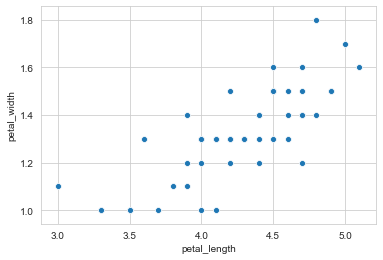

In [377]:
sns.scatterplot(x='petal_length',y='petal_width', 
                data=data)

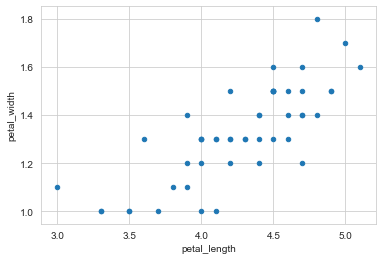

In [386]:
data.plot(x='petal_length', y='petal_width', 
          kind='scatter')

In [450]:
from sklearn.model_selection import train_test_split
X = data['petal_length'].values.reshape(-1,1)
y = data['petal_width'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)
print(data.shape)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(50, 2)


((33, 1), (17, 1), (33, 1), (17, 1))

In [451]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

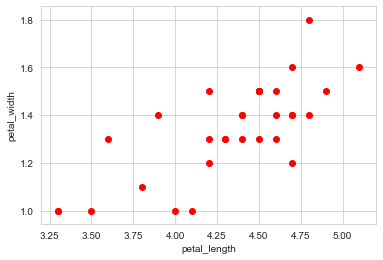

In [452]:
plt.scatter(x=X_train,y=y_train, c="Red")
plt.xlabel("petal_length"); plt.ylabel("petal_width");

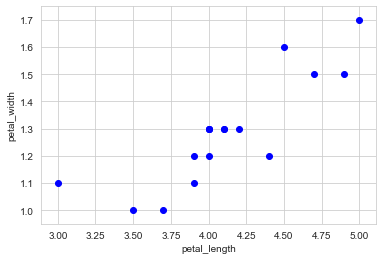

In [453]:
plt.scatter(x=X_test,y=y_test, c="Blue")
plt.xlabel("petal_length"); plt.ylabel("petal_width");

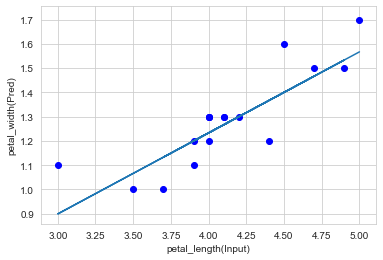

In [458]:
y_pred = model.predict(X_test)
plt.scatter(x=X_test,y=y_test, c='blue')
plt.plot(X_test, y_pred)
plt.xlabel("petal_length(Input)") 
plt.ylabel("petal_width(Pred)");

In [463]:
print("Intercept: " + str(model.intercept_))
print("Co-ef: " + str(model.coef_))


Intercept: [-0.10228121]
Co-ef: [[0.3338594]]


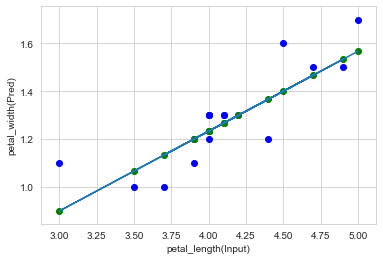

In [497]:
y_pred = model.predict(X_test)
plt.scatter(x=X_test,y=y_test, c='blue')
plt.plot(X_test, y_pred)
plt.scatter(x=X_test,y=y_pred, c='green',marker='o')
plt.xlabel("petal_length(Input)") 
plt.ylabel("petal_width(Pred)");

In [469]:
#mean of our inputs and outputs
x_mean = np.mean(X_train)
y_mean = np.mean(y_train)
n = len(X_train)
#using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X_train[i] - x_mean) * \
                    (y_train[i] - y_mean)
    denominator += (X_train[i] - x_mean) ** 2
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
print("Intercept: " + str(b0))
print("Co-ef: " + str(b1))

Intercept: [-0.10228121]
Co-ef: [0.3338594]


In [499]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np
print('Mean Absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('R Square Score: %.2f' % r2_score(y_test, y_pred))


Mean Absolute error: 0.08
Mean squared error: 0.01
Root Mean squared error: 0.10
R Square Score: 0.71


In [ ]:
np.